## Business Understanding

You work for a __consumer finance company__ which specialises in lending various types of loans to urban customers. <br> When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. <br>


Two types of risks are associated with the bank’s decision:
- If the applicant is __likely to repay the loan__, then not approving the loan results in a loss of business to the company

- If the applicant is not __likely to repay the loan__, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company


The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. <br> The aim is to identify patterns which indicate if a person is likely to default,which may be used for taking actions such as denying the loan,<br> reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

<br>

When a person applies for a loan, there are two types of decisions that could be taken by the company:

- __Loan accepted__: If the company approves the loan, there are 3 possible scenarios described below:

    - __Fully paid__: Applicant has fully paid the loan (the principal and the interest rate)

    - __Current__: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    - __Charged-off__: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

- __Loan rejected__: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures.<br> Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the __driving factors (or driver variables)__ behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).


## Load all required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500,'display.max_columns', 500,'display.width', 1000)
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = (12,8)

## Load Files

In [2]:
features = pd.read_excel('Data_Dictionary.xlsx')
features

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
5,annual_inc_joint,The combined self-reported annual income provi...
6,application_type,Indicates whether the loan is an individual ap...
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/...


In [3]:
# Load the dataset
loan_df = pd.read_csv('loan.csv')
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Check Dataset Attributes

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


_There are 111 columns and 39716 rows in the dataset_

In [5]:
loan_df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [6]:
#Print the datatypes
loan_df.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [7]:
#Check Statistics for Categorical Features
loan_df.describe(include=['object']).T


,count,unique,top,freq
term,39717,2,36 months,29096
int_rate,39717,371,10.99%,956
grade,39717,7,B,12020
sub_grade,39717,35,B3,2917
emp_title,37258,28820,US Army,134
emp_length,38642,11,10+ years,8879
home_ownership,39717,5,RENT,18899
verification_status,39717,3,Not Verified,16921
issue_d,39717,55,Dec-11,2260
loan_status,39717,3,Fully Paid,32950


_As it looks, there are several columns which have either entirely empty or have majorly NaN values_.<br>

 ## Data Cleaning:
 
_We will inspect individual columns for null values and other cleaning opportunities._

In [8]:
# Calculate NaN values percentage in each of the columns.
percent_missing = loan_df.isnull().sum() * 100 / len(loan_df)
missing_value_df = pd.DataFrame({'column_name': loan_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=False, inplace=True)
missing_value_df = missing_value_df.reset_index(drop=True)  

In [9]:
print(f"There are {len(missing_value_df)} columns with missing values." )  


There are 111 columns with missing values.


__We will identify columns having more than 50 % of its values as missing and we will remove these columns from our main DataFrame before proceeding further.__


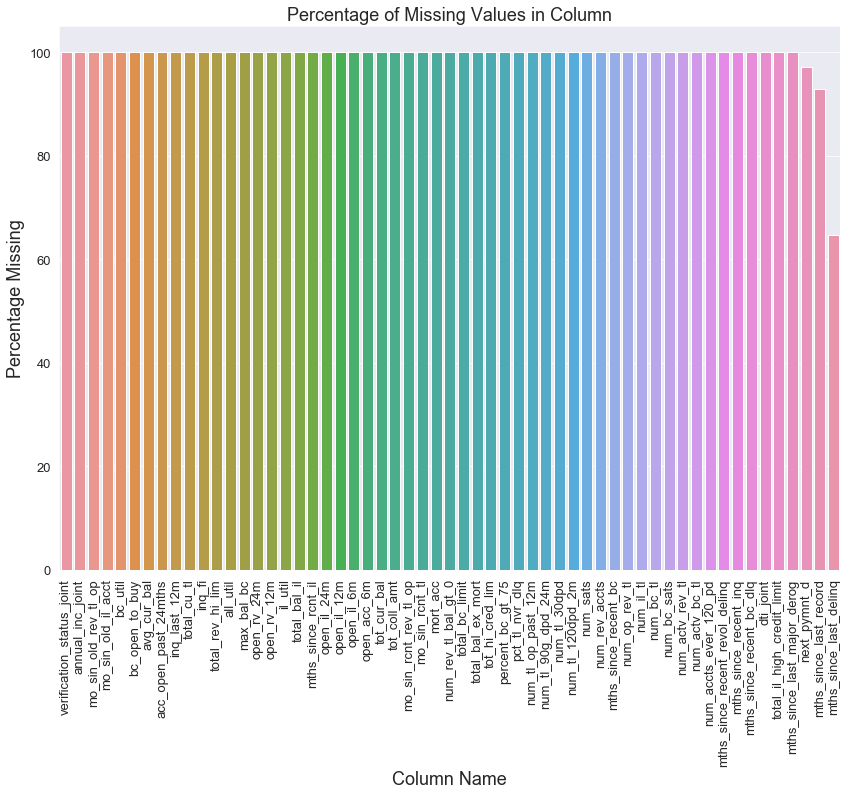

In [10]:
#Check columns with 50% null values 
plt.figure(figsize=(14,10))
plt.title('Percentage of Missing Values in Column',fontsize=18)
sns.barplot(x='column_name',y='percent_missing',data=missing_value_df[missing_value_df.percent_missing > 50])
plt.ylabel('Percentage Missing',fontsize=18)
plt.xlabel('Column Name',fontsize=18)
plt.xticks(rotation=90)
plt.tick_params(size=5,labelsize = 13)
plt.show()



In [11]:
columns_to_be_removed = missing_value_df[missing_value_df.percent_missing > 50]['column_name'].to_list()
print(f'There are {len(columns_to_be_removed)} columns having more than 50% values as NaN')


There are 57 columns having more than 50% values as NaN


In [12]:
# Remove columns having more than 50 percent null values.
loan_df = loan_df[loan_df.columns[~loan_df.columns.isin(columns_to_be_removed)]]

In [13]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

__Now, we are left with 54 non-null columns and 39,716 Rows.__ <br>
__Lets check the missing values in the remaining columns__

In [14]:
columns_with_a_null_value = loan_df.columns[loan_df.isna().any()]

In [15]:
print('The columns with atleast one null value are:')
print('--------------------------------------------')
print([col for col in columns_with_a_null_value])



The columns with atleast one null value are:
--------------------------------------------
['emp_title', 'emp_length', 'desc', 'title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']


In [16]:
# Remove the data where loan_status is Current as it will not add any value to our analysis.
loan_df = loan_df[~(loan_df["loan_status"]=="Current")]

__Lets check each column separately and handle the missing values.__

### _emp_title_

In [17]:
def plot_counts(feature,x_label):
    '''feature : column of for which count has to be plotted 
      x_label: Description of the feature
     '''
    plt.title(f'Top 20 {feature.upper()} Counts',fontsize=18)
    sns.countplot(y = feature,data =loan_df,order=pd.value_counts(loan_df[f'{feature}']).iloc[:20].index)
    plt.ylabel('Counts',fontsize=18)
    plt.tick_params(size=5,labelsize = 13)
    plt.xlabel(x_label,fontsize=18 )
    plt.show()


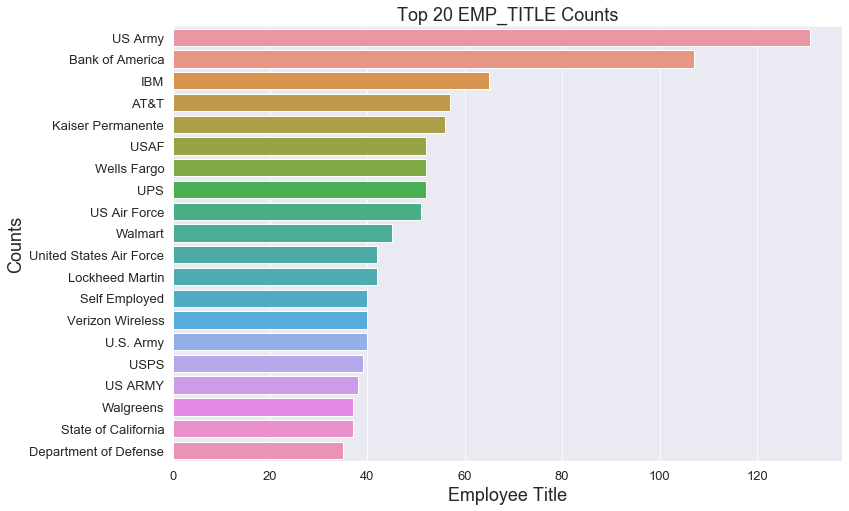

In [18]:
plot_counts("emp_title","Employee Title")



In [19]:
# Remove rows with a missing emp_title
loan_df = loan_df[~loan_df["emp_title"].isna()]

### _emp_length_

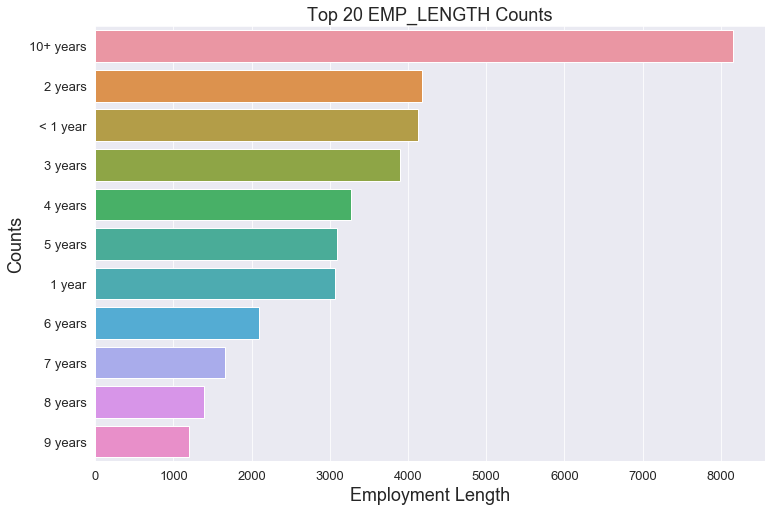

In [20]:
plot_counts('emp_length','Employment Length')

_Majority of the loan applicants seem to have more than 10+ years of employment duration._

In [21]:
# remove rows with missing emp_length
loan_df = loan_df[~loan_df.emp_length.isna()]

In [22]:
# Clean emp_length column
def extract_emp_length(text):
    ''' this function returns the numeric part from the string emp_length '''
    if text == '< 1 year':
        return 0
    else:
        return re.findall('\\d+',text)[0]

loan_df['emp_length_cleaned'] = loan_df.emp_length.apply(lambda x: extract_emp_length(x)).astype('category')

### title and desc

In [23]:
# Title 
print("Missing values in \"desc\" :",loan_df["desc"].isna().sum())
print("------------------------------------------------------------")
print(loan_df["desc"][1])
print("------------------------------------------------------------")
print(loan_df["title"][1])

Missing values in "desc" : 11680
------------------------------------------------------------
  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>
------------------------------------------------------------
bike


__The title columns is a tag given to the loan application according to the description column.__ <br>
_We will drop this column and keep "title" column._

In [24]:
loan_df.drop(columns=['desc'],inplace=True)

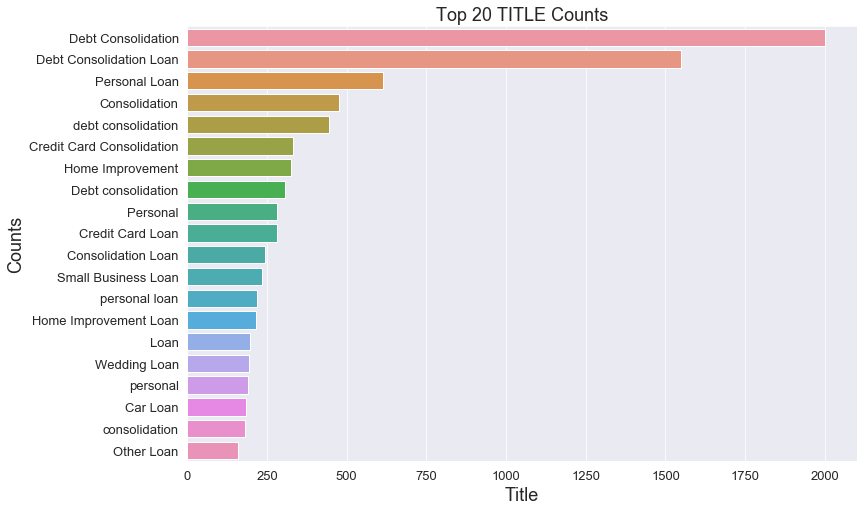

In [25]:
plot_counts('title','Title')

In [26]:
# Remove title rows with null values
loan_df = loan_df[~loan_df.title.isna()]

In [27]:
loan_df = loan_df[~loan_df["revol_util"].isna()]

In [28]:
# Remove % from column
loan_df['revol_util_cleaned'] = loan_df.revol_util.str.rstrip('%').astype('float')

In [29]:
# Dropping id and member_id columns
loan_df.drop(columns=['id','member_id'],inplace = True)

### Other Columns

Customer behaviour features/variables are to be removed from analysis as they would not be available during a new application <br>
and other columns which have single value.

In [30]:
loan_df=loan_df[~loan_df["last_pymnt_d"].isna()]
loan_df=loan_df[~loan_df["last_credit_pull_d"].isna()]



In [31]:
loan_df["collections_12_mths_ex_med"].unique()



array([ 0., nan])

In [32]:
loan_df["chargeoff_within_12_mths"].unique()

array([ 0., nan])

In [33]:
loan_df["tax_liens"].unique()

array([ 0., nan])

In [34]:
print(loan_df["pub_rec_bankruptcies"].unique())
print("----------------------")
print(loan_df["pub_rec_bankruptcies"].value_counts())

[ 0.  1.  2. nan]
----------------------
0.0    33898
1.0     1464
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


In [35]:
list_cols = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']
loan_df.drop(list_cols,axis=1,inplace=True)

In [36]:
loan_df["pymnt_plan"].value_counts()

n    36021
Name: pymnt_plan, dtype: int64

In [37]:
loan_df["url"].unique()[:5]

array(['https://lendingclub.com/browse/loanDetail.action?loan_id=1077430',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1076863',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1075269',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1069639',
       'https://lendingclub.com/browse/loanDetail.action?loan_id=1072053'],
      dtype=object)

In [38]:
loan_df = loan_df.drop(columns=['pymnt_plan','url'])

In [39]:
loan_df["initial_list_status"].value_counts()

f    36021
Name: initial_list_status, dtype: int64

In [40]:
loan_df = loan_df.drop(columns=['initial_list_status'])

In [41]:
loan_df["policy_code"].unique()

array([1], dtype=int64)

In [42]:
loan_df = loan_df.drop(columns=['policy_code'])

In [43]:
print(loan_df["application_type"].unique())
loan_df["application_type"].value_counts()

['INDIVIDUAL']


INDIVIDUAL    36021
Name: application_type, dtype: int64

In [44]:
loan_df["acc_now_delinq"].unique()

array([0], dtype=int64)

In [45]:
loan_df["delinq_amnt"].unique()

array([0], dtype=int64)

In [46]:
loan_df["delinq_amnt"].unique()


array([0], dtype=int64)

In [47]:
loan_df = loan_df.drop(columns=['application_type','acc_now_delinq','delinq_amnt'])

In [48]:
loan_df["funded_amnt"].unique()

array([ 2500, 10000,  5000, ...,   800, 13875, 22350], dtype=int64)

In [49]:
loan_df["funded_amnt_inv"].unique()

array([ 2500., 10000.,  5000., ...,   200.,    75.,   150.])

In [50]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36021 entries, 1 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   loan_amnt                36021 non-null  int64   
 1   funded_amnt              36021 non-null  int64   
 2   funded_amnt_inv          36021 non-null  float64 
 3   term                     36021 non-null  object  
 4   int_rate                 36021 non-null  object  
 5   installment              36021 non-null  float64 
 6   grade                    36021 non-null  object  
 7   sub_grade                36021 non-null  object  
 8   emp_title                36021 non-null  object  
 9   emp_length               36021 non-null  object  
 10  home_ownership           36021 non-null  object  
 11  annual_inc               36021 non-null  float64 
 12  verification_status      36021 non-null  object  
 13  issue_d                  36021 non-null  object  
 14  loan_s

In [51]:
loan_df.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late

In [52]:
columns_to_be_removed = ["last_credit_pull_d","last_pymnt_amnt","last_pymnt_d","collection_recovery_fee","recoveries",  "total_rec_late_fee","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee",           
                        'revol_bal', 'revol_util', 'total_acc', 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                         'total_rec_prncp','total_rec_int','delinq_2yrs',"revol_util_cleaned"]

loan_df.drop(columns=columns_to_be_removed,inplace=True,axis=1)

In [53]:
loan_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36021 entries, 1 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            36021 non-null  int64   
 1   funded_amnt          36021 non-null  int64   
 2   funded_amnt_inv      36021 non-null  float64 
 3   term                 36021 non-null  object  
 4   int_rate             36021 non-null  object  
 5   installment          36021 non-null  float64 
 6   grade                36021 non-null  object  
 7   sub_grade            36021 non-null  object  
 8   emp_title            36021 non-null  object  
 9   emp_length           36021 non-null  object  
 10  home_ownership       36021 non-null  object  
 11  annual_inc           36021 non-null  float64 
 12  verification_status  36021 non-null  object  
 13  issue_d              36021 non-null  object  
 14  loan_status          36021 non-null  object  
 15  purpose            

In [54]:
# clean term column
loan_df['term_cleaned']=loan_df.term.str.extract('(\d+)')
loan_df['term_cleaned'] = loan_df['term_cleaned'].astype('category')

In [55]:
# Clean int_rate column
loan_df['int_rate_cleaned'] = loan_df.int_rate.str.rstrip('%').astype('float')

In [56]:
# Remove original uncleaned columns
loan_df.drop(columns=["emp_length","int_rate","term"],axis=1,inplace=True)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36021 entries, 1 to 39716
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   loan_amnt            36021 non-null  int64   
 1   funded_amnt          36021 non-null  int64   
 2   funded_amnt_inv      36021 non-null  float64 
 3   installment          36021 non-null  float64 
 4   grade                36021 non-null  object  
 5   sub_grade            36021 non-null  object  
 6   emp_title            36021 non-null  object  
 7   home_ownership       36021 non-null  object  
 8   annual_inc           36021 non-null  float64 
 9   verification_status  36021 non-null  object  
 10  issue_d              36021 non-null  object  
 11  loan_status          36021 non-null  object  
 12  purpose              36021 non-null  object  
 13  title                36021 non-null  object  
 14  zip_code             36021 non-null  object  
 15  addr_state         

_Now we are left with 24 columns for analysis.<br> We will continue with Univariate, Segmented Univariate and Bivariate Analysis._

## Univariate Analysis

In [57]:
# function to plot distribution of features.
def plot_distribution(column_name,x_label):
    plt.figure(figsize=(10,6))
    sns.distplot(loan_df[column_name],color="green") 
    plt.title(f"{x_label} Distributions ",fontsize=18)
    plt.xlabel(x_label,fontsize=18)
    plt.tick_params(size=5,labelsize = 13)
    plt.grid(0.3)


In [58]:
loan_df['annual_inc_bins'] = pd.qcut(loan_df['annual_inc'], q=6)

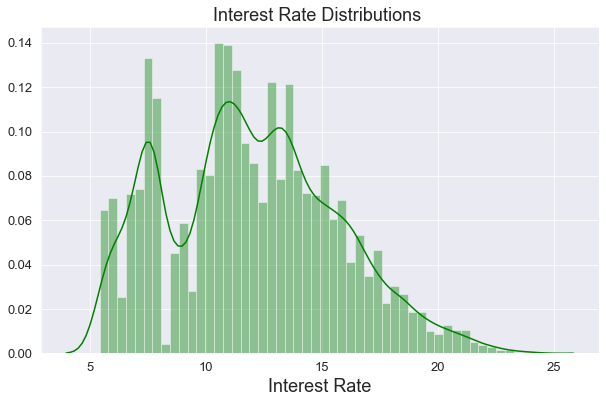

In [59]:
plot_distribution("int_rate_cleaned","Interest Rate")

_Most of the interest rates lie between 10 to 15 %_

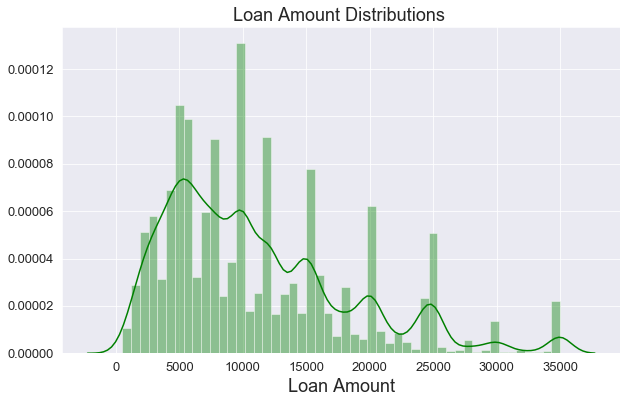

In [60]:
plot_distribution("loan_amnt","Loan Amount")

_Loan amount are majorly in the range of 5000 to 15000_

In [61]:
# We will map the labels in the loan status as 0 and 1 for simpler and cleaner analysis.
loan_df['loan_status_mapped'] = loan_df.loan_status.map({'Charged Off':1, 'Fully Paid':0})

In [62]:
# This function plots a Bar plot of Charged Off Rate for a feature
def charged_off_rate_by_feature(column_name,label):
    plt.title(f'Charged Off Rate for {label}',fontsize = 18)
    sns.barplot(x = column_name,y='loan_status_mapped',data= loan_df)
    plt.xlabel(label,fontsize= 18)
    plt.ylabel('Rate',fontsize= 18)
    plt.tick_params(size=5,labelsize = 15)
    plt.show()

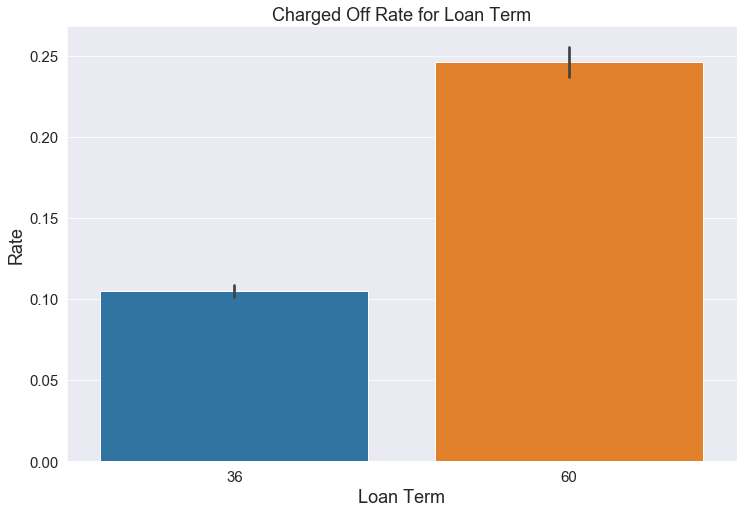

In [63]:
charged_off_rate_by_feature('term_cleaned',"Loan Term")

_The charged rate in case of 60 Months loan tenure is more._


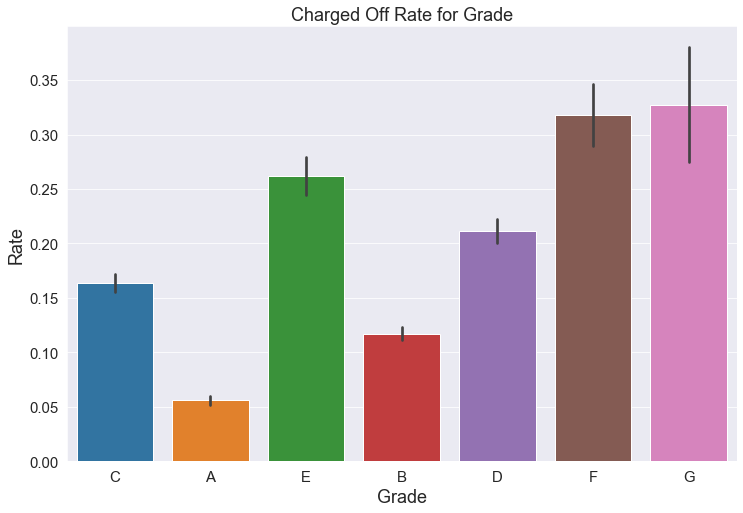

In [64]:
charged_off_rate_by_feature('grade',"Grade")

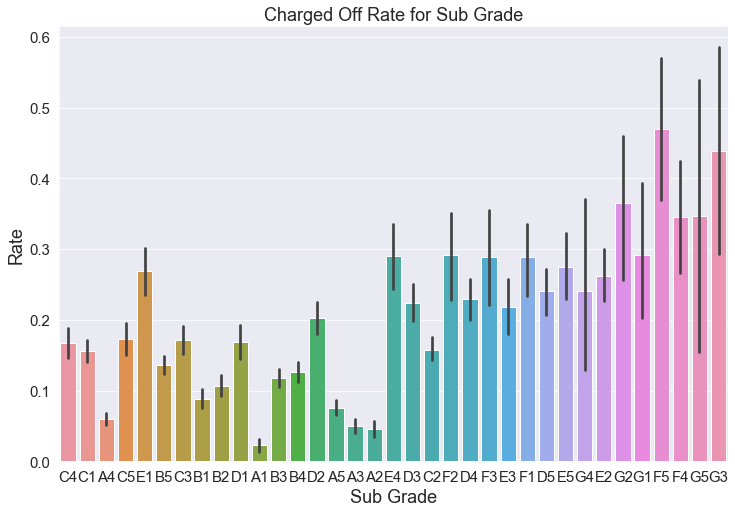

In [65]:
charged_off_rate_by_feature('sub_grade',"Sub Grade")


_By looking at the Grade and Subgrade we can conclude that the grades D,E,F,G have higher charged off rates than the other grades._

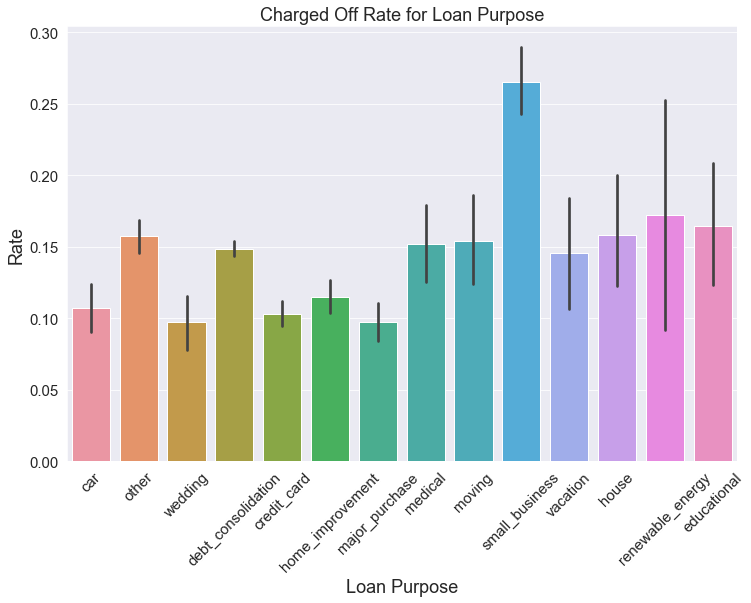

In [66]:
plt.xticks(rotation=45)
charged_off_rate_by_feature('purpose',"Loan Purpose")

_Loans that are being availed for Small Businesses, renewable energy, housing and education have a higher charged off rate._


In [67]:
loan_df['int_rate_bins'] = pd.qcut(loan_df['int_rate_cleaned'], q=3)

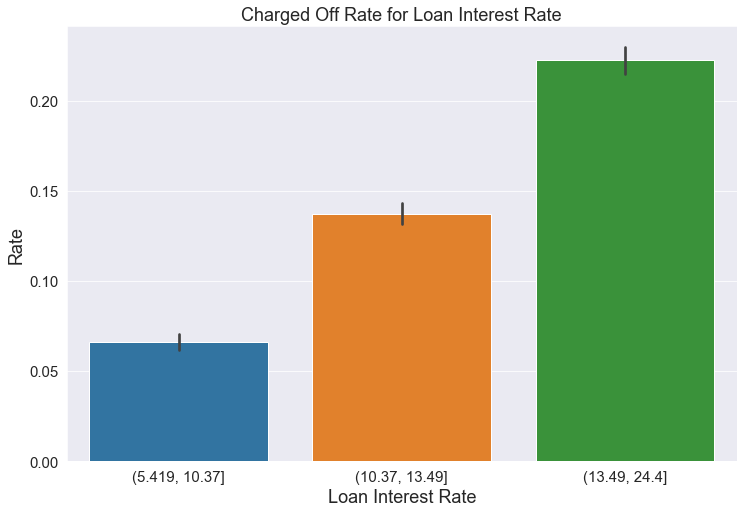

In [68]:
charged_off_rate_by_feature('int_rate_bins',"Loan Interest Rate")

_The higher the interest rate the higher the chances of the loan getting charged off._

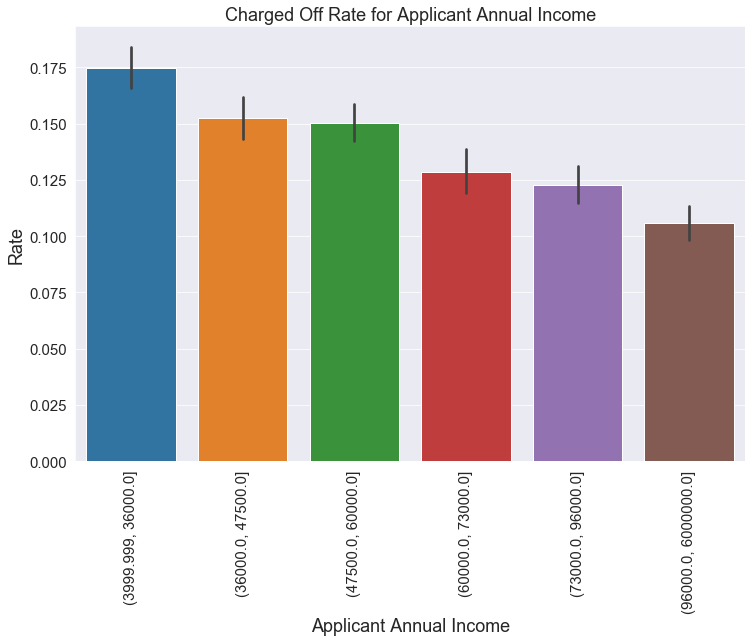

In [69]:
plt.xticks(rotation=90)
charged_off_rate_by_feature("annual_inc_bins","Applicant Annual Income")


_There are evidences of higher Charged Off Rate in case of lower income brackets._


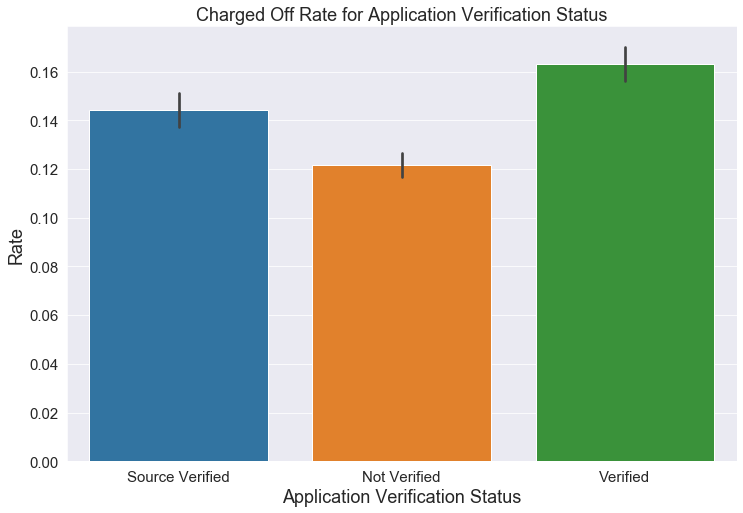

In [70]:
charged_off_rate_by_feature('verification_status',"Application Verification Status")


In [71]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,emp_length_cleaned,term_cleaned,int_rate_cleaned,annual_inc_bins,loan_status_mapped,int_rate_bins
1,2500,2500,2500.0,59.83,C,C4,Ryder,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,Apr-99,5,3,0,0,60,15.27,"(3999.999, 36000.0]",1,"(13.49, 24.4]"
3,10000,10000,10000.0,339.31,C,C1,AIR RESOURCES BOARD,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,Feb-96,1,10,0,10,36,13.49,"(47500.0, 60000.0]",0,"(10.37, 13.49]"
5,5000,5000,5000.0,156.46,A,A4,Veolia Transportaton,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,Nov-04,3,9,0,3,36,7.90,"(3999.999, 36000.0]",0,"(5.419, 10.37]"
6,7000,7000,7000.0,170.08,C,C5,Southern Star Photography,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,Jul-05,1,7,0,8,60,15.96,"(36000.0, 47500.0]",0,"(13.49, 24.4]"
7,3000,3000,3000.0,109.43,E,E1,MKC Accounting,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,900xx,CA,5.35,Jan-07,2,4,0,9,36,18.64,"(47500.0, 60000.0]",0,"(13.49, 24.4]"


In [72]:
loan_df['emp_length_bins'] = pd.qcut(loan_df['int_rate_cleaned'], q=4)

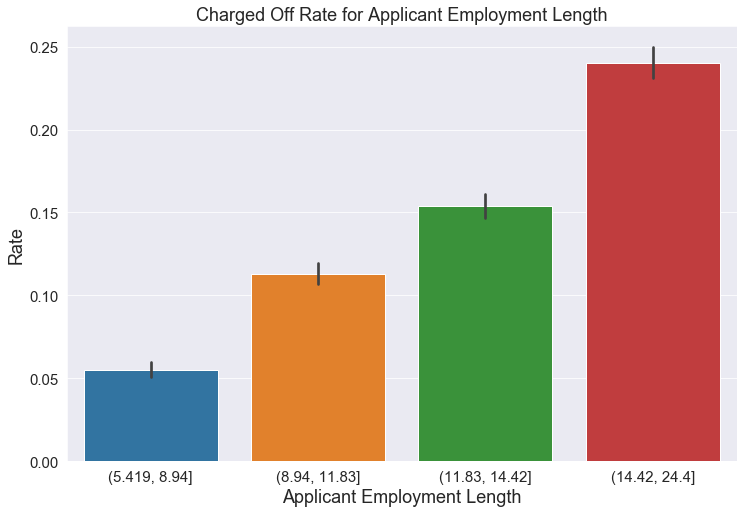

In [73]:
charged_off_rate_by_feature('emp_length_bins',"Applicant Employment Length")

In [74]:
def get_information_content_for_feature(column_name):
    total_charged_off = loan_df.loan_status_mapped.sum()
    content_df = loan_df.groupby(column_name)[['loan_status_mapped']].agg('sum').apply(lambda x: x / total_charged_off)
    return content_df.loan_status_mapped.max() - content_df.loan_status_mapped.min() 

  Lets derive the impact of features towards Charged Off loans by calculating the information content .

In [75]:
get_information_content_for_feature('emp_length_bins')


0.3273986152324431

In [76]:
get_information_content_for_feature('grade')


0.23501483679525226

In [77]:
get_information_content_for_feature('int_rate_bins')

0.3457962413452028

In [78]:
get_information_content_for_feature('purpose')

0.5030662710187933

In [79]:
get_information_content_for_feature("annual_inc_bins")

0.10306627101879327

_On observing the above features, we can conclude that __Purpose__ has the highest information content on charged Off loans followed by __Interest Rate__, __Employment Length__, __Grade__ and __Annual Income__._

### Charged Off Loans Trend by Year

In [80]:
loan_df['issue_date'] = pd.to_datetime(loan_df['issue_d'],format='%b-%y')

loan_df['issue_year'] = loan_df.issue_date.dt.year

loan_df['issue_month'] = loan_df.issue_date.dt.month

In [81]:
total_charged_off = loan_df.loan_status_mapped.sum()
year_wise_charged_off_df = loan_df.groupby('issue_year')[['loan_status_mapped']].agg('sum').apply(lambda x: x / total_charged_off)

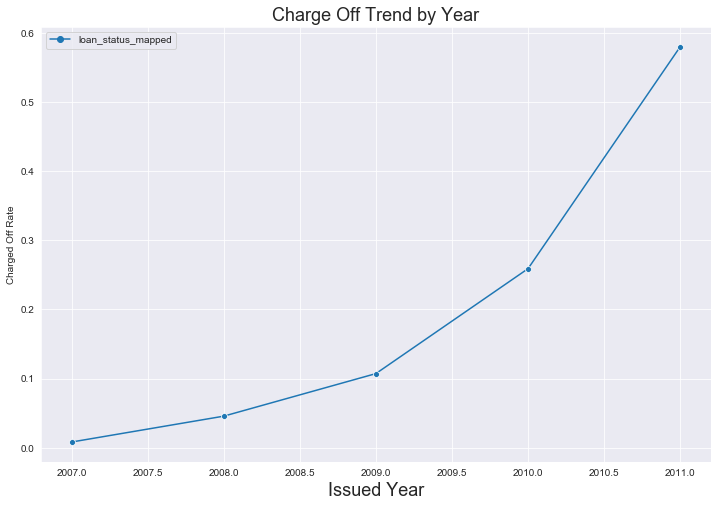

In [82]:
plt.title('Charge Off Trend by Year',fontsize = 18)
sns.lineplot(data=year_wise_charged_off_df,markers=True)
plt.xlabel('Issued Year',fontsize = 18)
plt.ylabel('Charged Off Rate')
plt.show()

_The charged off rate was initially very low in 2007 but it increased drastically by 2011._


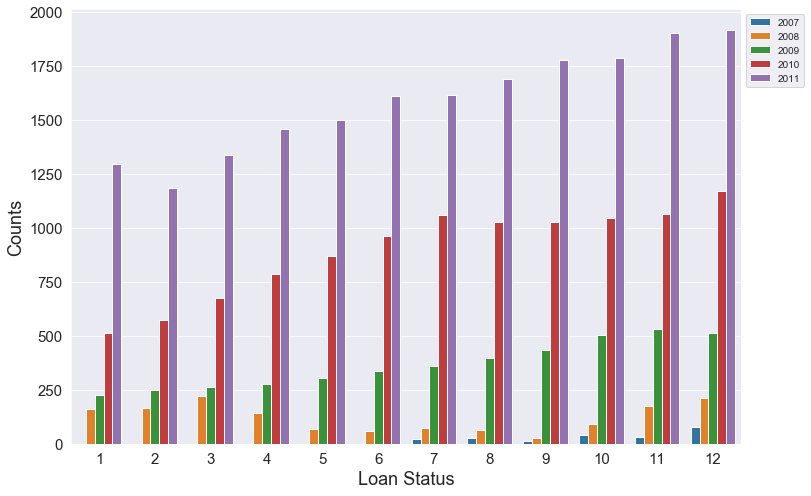

In [83]:
sns.countplot(x = 'issue_month',data =loan_df,hue = 'issue_year')
plt.ylabel('Counts',fontsize=18)
plt.xlabel('Loan Status',fontsize=18)
plt.tick_params(size=5,labelsize = 15)
plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.show()

_Seems like for all the years, the majority of the loans were issued in the month of December_

### Analyze by State

In [84]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,grade,sub_grade,emp_title,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,emp_length_cleaned,term_cleaned,int_rate_cleaned,annual_inc_bins,loan_status_mapped,int_rate_bins,emp_length_bins,issue_date,issue_year,issue_month
1,2500,2500,2500.0,59.83,C,C4,Ryder,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,Apr-99,5,3,0,0,60,15.27,"(3999.999, 36000.0]",1,"(13.49, 24.4]","(14.42, 24.4]",2011-12-01,2011,12
3,10000,10000,10000.0,339.31,C,C1,AIR RESOURCES BOARD,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,Feb-96,1,10,0,10,36,13.49,"(47500.0, 60000.0]",0,"(10.37, 13.49]","(11.83, 14.42]",2011-12-01,2011,12
5,5000,5000,5000.0,156.46,A,A4,Veolia Transportaton,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,Nov-04,3,9,0,3,36,7.90,"(3999.999, 36000.0]",0,"(5.419, 10.37]","(5.419, 8.94]",2011-12-01,2011,12
6,7000,7000,7000.0,170.08,C,C5,Southern Star Photography,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280xx,NC,23.51,Jul-05,1,7,0,8,60,15.96,"(36000.0, 47500.0]",0,"(13.49, 24.4]","(14.42, 24.4]",2011-12-01,2011,12
7,3000,3000,3000.0,109.43,E,E1,MKC Accounting,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,900xx,CA,5.35,Jan-07,2,4,0,9,36,18.64,"(47500.0, 60000.0]",0,"(13.49, 24.4]","(14.42, 24.4]",2011-12-01,2011,12


In [85]:
df_state = loan_df.groupby('addr_state')[["loan_amnt"]].count()
df_state.reset_index(inplace=True)
df_state.head()

,addr_state,loan_amnt
0,AK,74
1,AL,404
2,AR,219
3,AZ,768
4,CA,6475


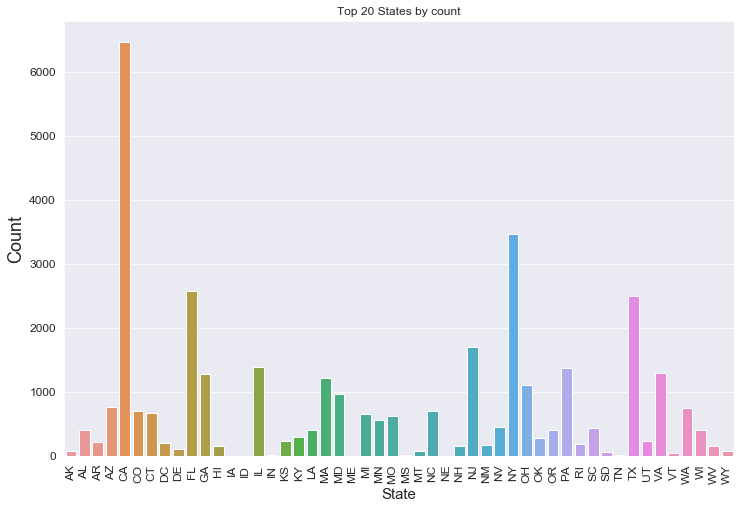

In [86]:
plt.title('Top 20 States by count')
sns.barplot(x='addr_state',y='loan_amnt',data=df_state)
plt.ylabel('Count',fontsize=18)
plt.xlabel('State',fontsize=15)
plt.tick_params(size=5,labelsize = 12)
plt.xticks(rotation=90)
plt.show()

_Seems like the most of the loans requested are from CA followed by NY and TX ._

## Segmented Univariate Analysis
 We will analyse different columns according to the loan status.

In [87]:

def create_stacked_plot_by_column(segment_column,label,aggfunc='count'):
    loan_df_grouped = loan_df.groupby([segment_column,'loan_status'])['loan_amnt'].agg('count')
    loan_amount_by_purpose = pd.pivot_table(data = loan_df,values='loan_amnt',index  = segment_column,columns='loan_status',aggfunc=aggfunc)
    loan_amount_by_purpose = loan_amount_by_purpose.apply(lambda x: x/x.sum(),axis=1)
    loan_amount_by_purpose.plot(kind='bar',stacked=True,figsize = [15,8])
    plt.legend(loc='best', bbox_to_anchor=(1,1))
    plt.xlabel(label,fontsize=18)
    plt.tick_params(size=5,labelsize = 15)
    plt.show()

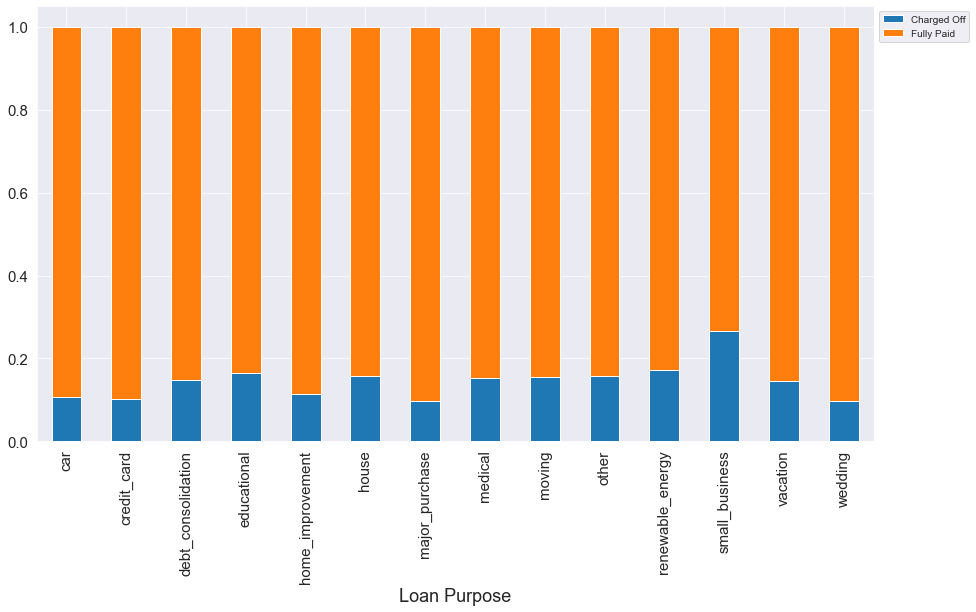

In [88]:
create_stacked_plot_by_column('purpose',"Loan Purpose")


_Loans taken for Small Business and Debt Consolidation have higher charged off rate._

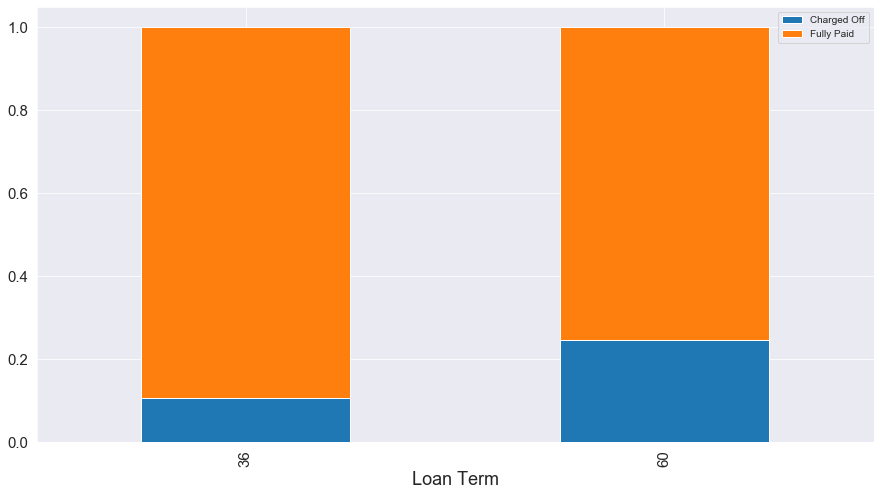

In [89]:
create_stacked_plot_by_column('term_cleaned',"Loan Term")

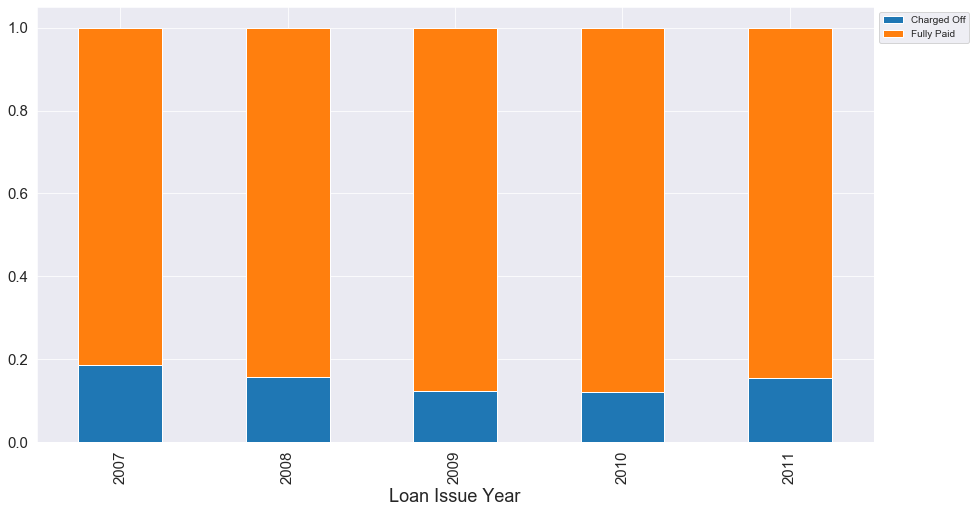

In [90]:
create_stacked_plot_by_column('issue_year',"Loan Issue Year")

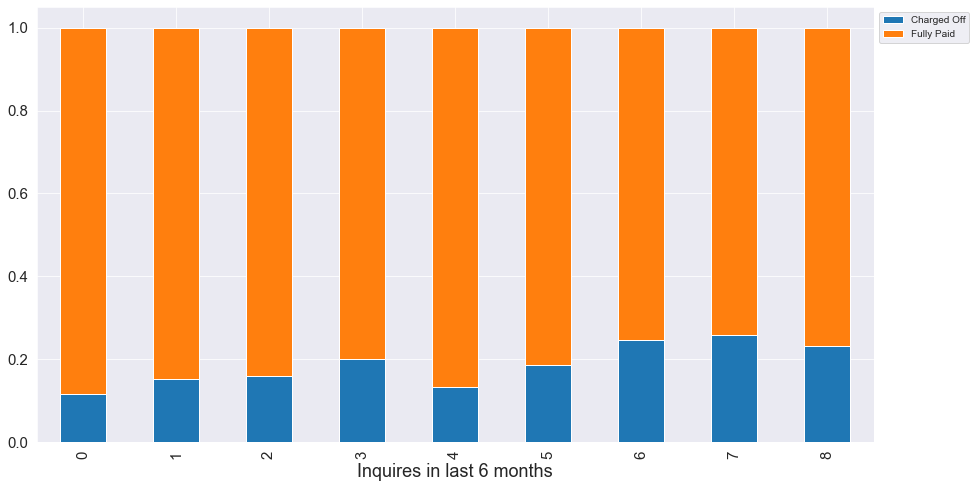

In [91]:
create_stacked_plot_by_column('inq_last_6mths',"Inquires in last 6 months")

_Higher the no of inquiries within the last 6 months,Higher is the chance of the loan getting charged off._

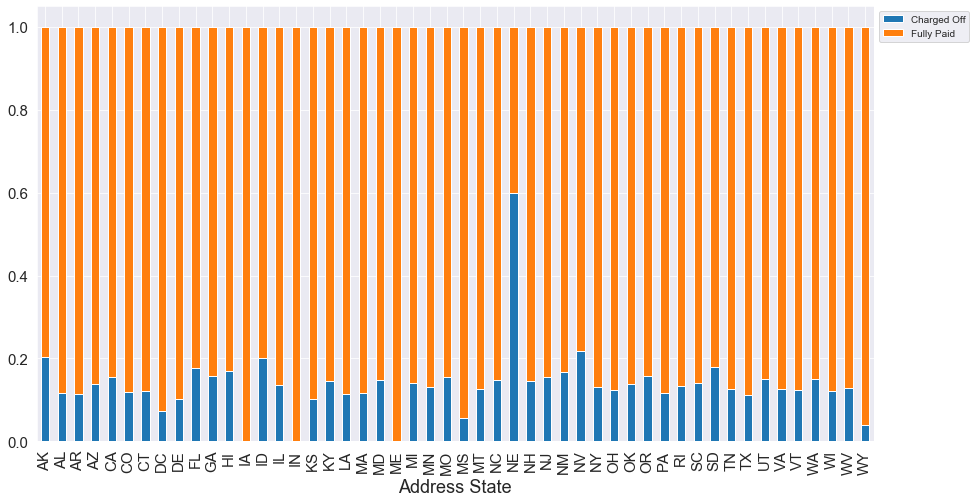

In [92]:
create_stacked_plot_by_column('addr_state',"Address State")

_Nebraska(NE) has the highest charged off loans followed by Nevada(NV) and Alaska(AK)._

### Explore Continous variables w.r.t to the label Loan_status
We will first bin the continous variables of interest and analyze the patterns


In [93]:
# Loan amount vs Loan_status
loan_df['loan_amount_bins']= pd.qcut(loan_df['loan_amnt'],q=10)

In [94]:
loan_df['loan_amount_bins'].value_counts()

(3200.0, 5000.0]      4972
(8000.0, 10000.0]     4815
(6000.0, 8000.0]      4522
(11500.0, 14000.0]    3996
(499.999, 3200.0]     3636
(21600.0, 35000.0]    3568
(16000.0, 21600.0]    3556
(14000.0, 16000.0]    3215
(5000.0, 6000.0]      2650
(10000.0, 11500.0]    1091
Name: loan_amount_bins, dtype: int64

In [95]:
def plot_variable_bin_count(column):
    plt.figure(figsize = [15,7])
    plt.title(f'Top {column} by count')
    sns.countplot(x = column,data =loan_df)
    plt.ylabel('Count',fontsize=18)
    plt.xlabel(f'{column} Bins',fontsize=18)
    plt.xticks(rotation=90)
    plt.tick_params(size=5,labelsize = 15)
    plt.show()


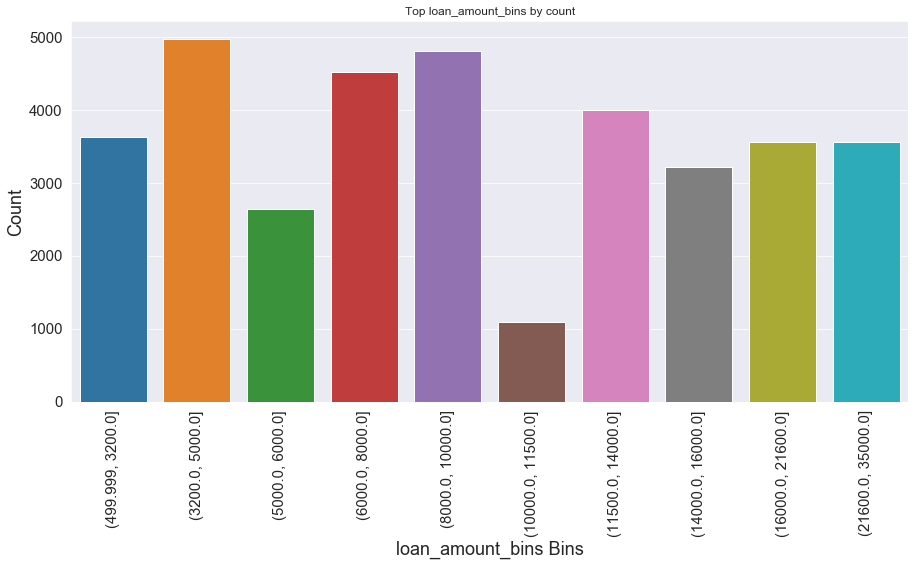

In [96]:
plot_variable_bin_count('loan_amount_bins')


_Majority of the loans provided are in the bucket of amounts between 3200-5000 ._

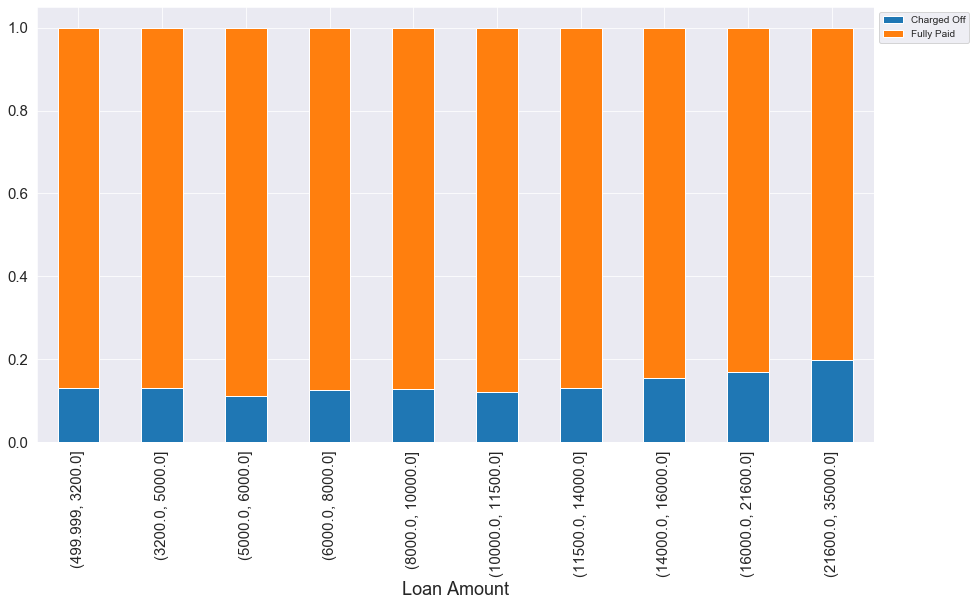

In [97]:
create_stacked_plot_by_column('loan_amount_bins',"Loan Amount")

In [98]:
# Debt to income ratio vs loan status
loan_df['dti_bins']= pd.qcut(loan_df['dti'],q=10)

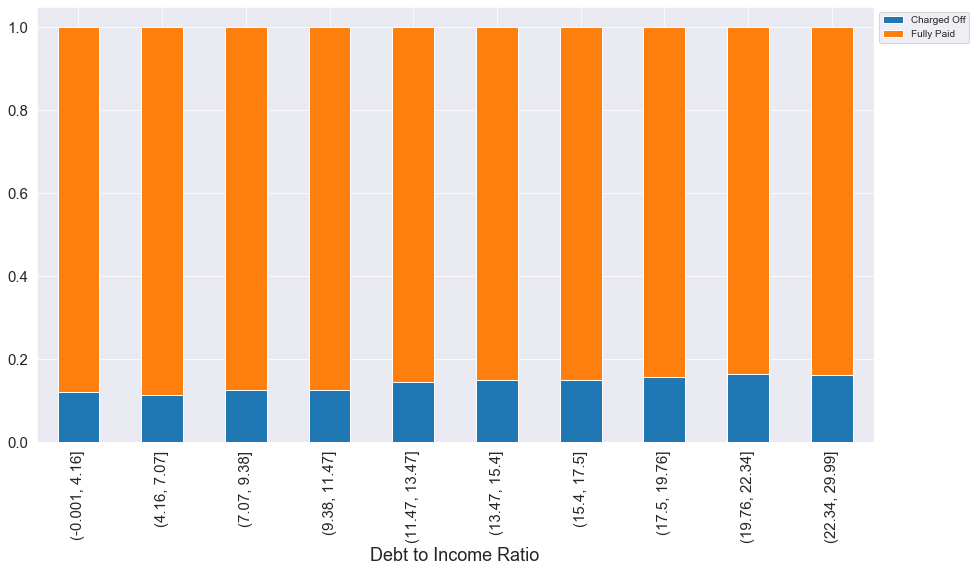

In [99]:
create_stacked_plot_by_column('dti_bins',"Debt to Income Ratio")

_The loan defaulting status slowly increases with the increase in one's debt-to-income ratio._

## Bivariate Analysis

### Loan Grade vs Installment 
__[What Is Loan Grading?](https://www.investopedia.com/terms/l/loan-grading.asp#:~:text=Loan%20grading%20is%20a%20classification,to%20a%20portfolio%20of%20loans.)__

Loan grading is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the collateral, and the likelihood of repayment of the principal and interest. A score can also be applied to a portfolio of loans. Loan grading is part of a lending institution's loan review or credit risk system and is usually an aspect of the credit underwriting and approval processes.


There are many purposes for a loan review system, such as identifying loans with credit weaknesses so banks can take steps to minimize credit risk, identifying trends affecting the collectability of the loan portfolio, and for financial and regulatory reporting purposes.





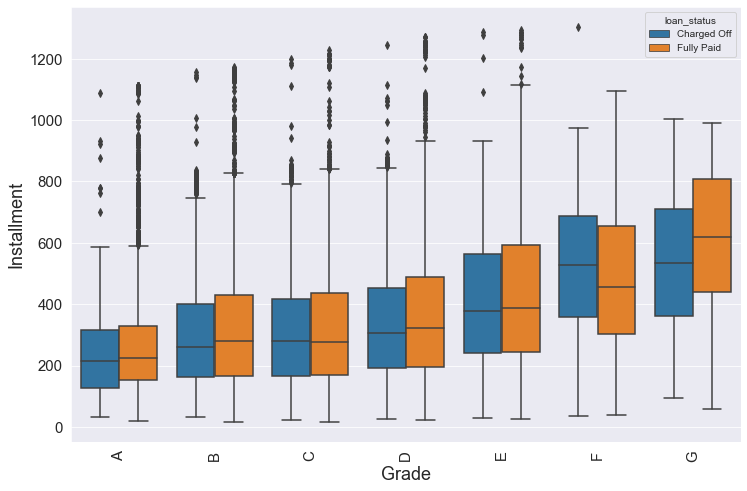

In [100]:
sns.boxplot(x = 'grade',y='installment',data= loan_df,order = ['A','B','C','D','E','F','G'],hue='loan_status')
plt.ylabel('Installment',fontsize=18)
plt.xlabel('Grade',fontsize=18)
plt.xticks(rotation=90)
plt.tick_params(size=5,labelsize = 15)
plt.show()

_As the loan grade goes from good to bad, the median installment also increases. <br>
The Lending Club has a good strategy of assigning higher installments to riskier loans.
But lets evaluate the efficacy of grading the credit history of the borrower properly._

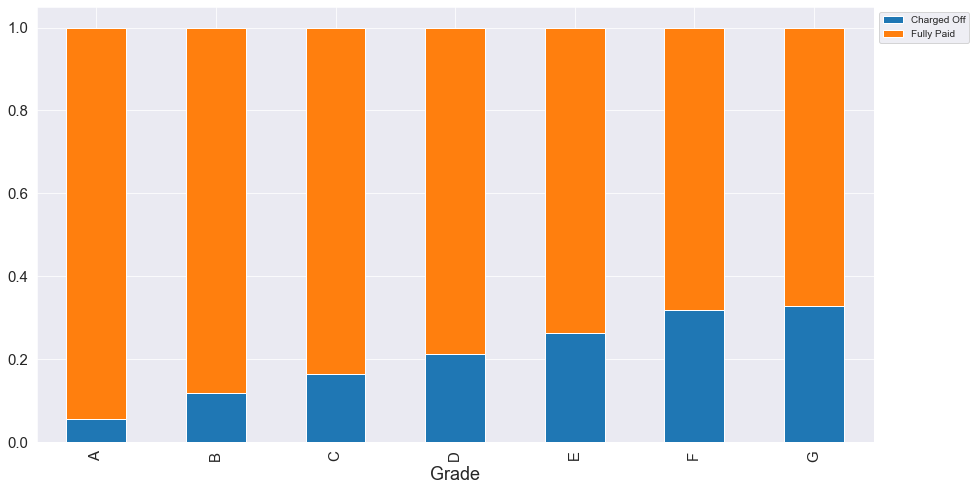

In [101]:
create_stacked_plot_by_column('grade',"Grade")

_As expected the percentage of Charged off loans increases with the worsening of the Grade.<br>
 But more efforts should be given in order to ascertain the risk profile of the borrower._


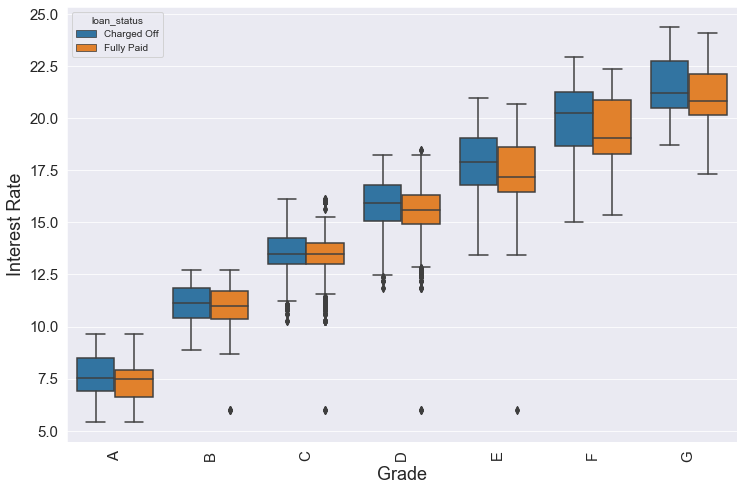

In [102]:
sns.boxplot(x = 'grade',y='int_rate_cleaned',data= loan_df,order = ['A','B','C','D','E','F','G'],hue='loan_status')
plt.ylabel('Interest Rate',fontsize=18)
plt.xlabel('Grade',fontsize=18)
plt.xticks(rotation=90)
plt.tick_params(size=5,labelsize = 15)
plt.show()

_This makes it clear that as the Grades change from good to bad the interest rate also increases_

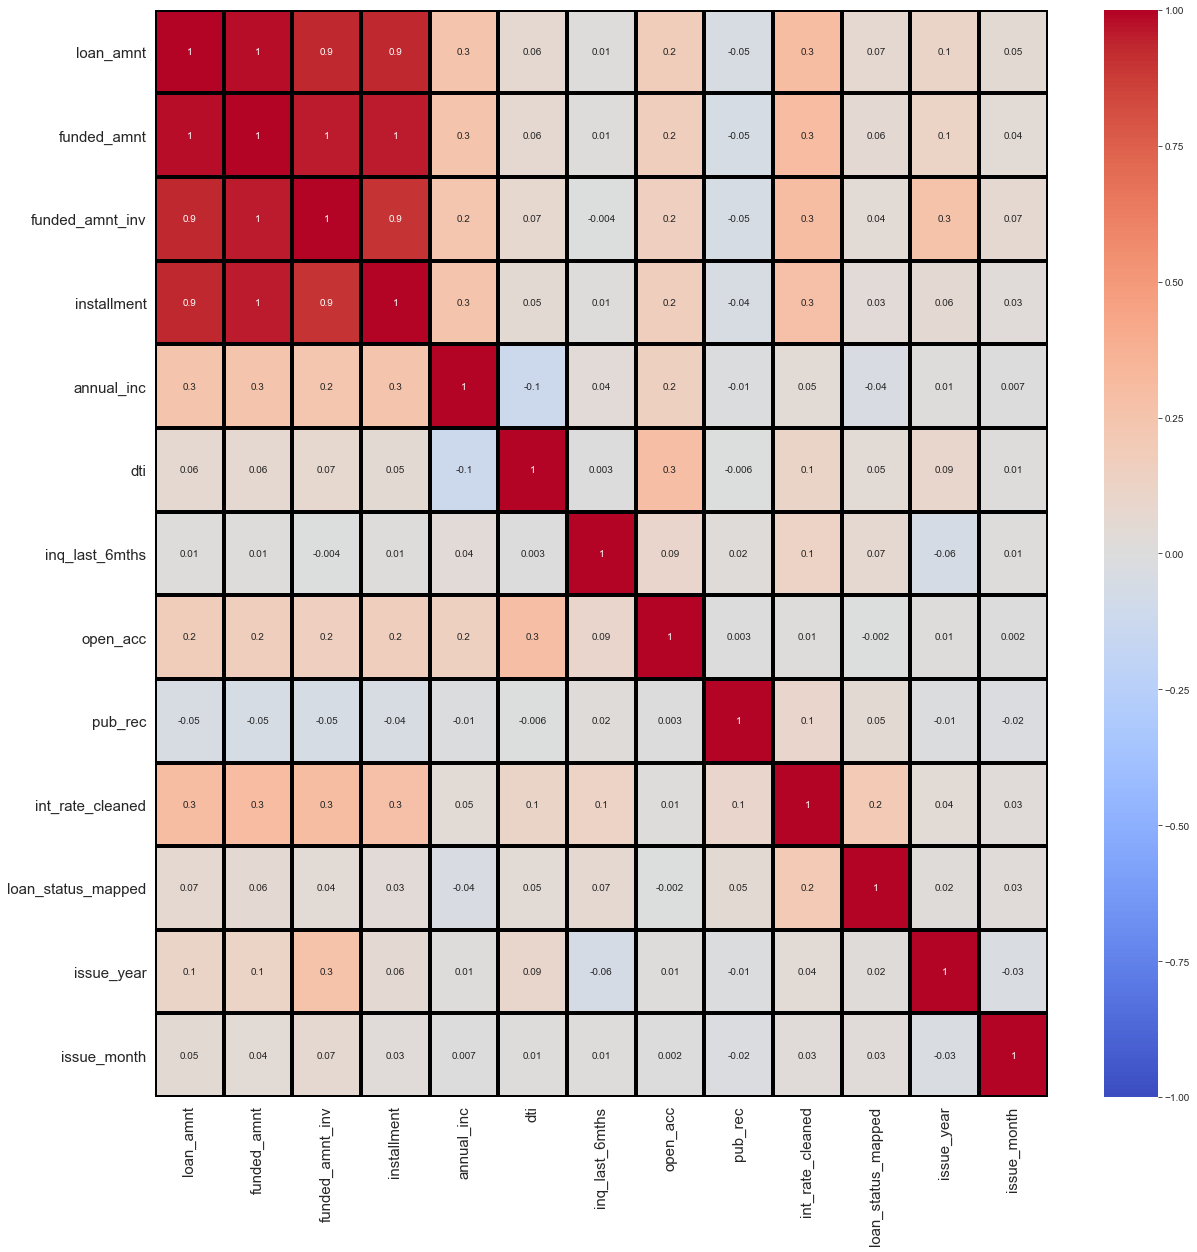

In [103]:
plt.figure(figsize=(20,20))
sns.heatmap(loan_df.corr(),annot=True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm',linewidths=3, linecolor='black')
plt.tick_params(size=5,labelsize = 15)

- Loan Amount, Funded Amount ,Funded Amount Invoice and Installment are highly correlated.
- Debt to Income Ratio is slightly correlated to the Open Account(No of Open Credit Lines)

## Findings

__Dataset Attributes:__ 
- There are 111 columns and 39716 rows in the dataset.
- There are several columns which have either entirely empty or have majorly NaN values.
- We choose columns which have less that 50% missing value for analysis and we remove Customer Behavior columns as well.<br>

__Univariate Analysis:__

- Charged Off rate is more in case of 60 Months duration loan tenure.
- Grades D,E,F,G have higher charged off rates than the other grades.
- Loans that are being availed for Small Businesses, renewable energy, housing and education have a higher charged off rate.
- The higher the interest rate the higher the chances of the loan getting charged off.
- On observing the above features, we can conclude that the 5 most Driving Features that have the highest information content on charged Off loans are Purpose, Interest Rate, Employment Length, Grade and Annual Income.
 
__Segmented Univariate Analysis:__

- Loans taken for Small Business and Debt Consolidation have higher charged off rate.
- Higher the no of inquiries within the last 6 months,Higher is the chance of the loan getting charged off.
- Nebraska(NE) has the highest charged off loans followed by Nevada(NV) and Alaska(AK).

__Bivariate Analysis:__

- The percentage of Charged off loans increases with the worsening of the Grade.
- More efforts should be given in order to ascertain the risk profile of the borrower.
- As the Grades change from good to bad the interest rate also increases.
- Few features that are positively correlated with each other are Loan Amount, Funded Amount ,Funded Amount Invoice and Installment.